In [ ]:
### This notebook contains the code for Extended Datafile S1 and S2

In [1]:
import ma_codes as codes
from ma_codes import mysize, mymap, gray_red

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

## Some Plotting Parameters
plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42
sb.set_style("ticks")
rocket = sb.color_palette("rocket", as_cmap = True)

#pd.set_option("display.max_columns", 100)
sc.logging.print_version_and_date()

Running Scanpy 1.10.2, on 2025-06-03 18:01.


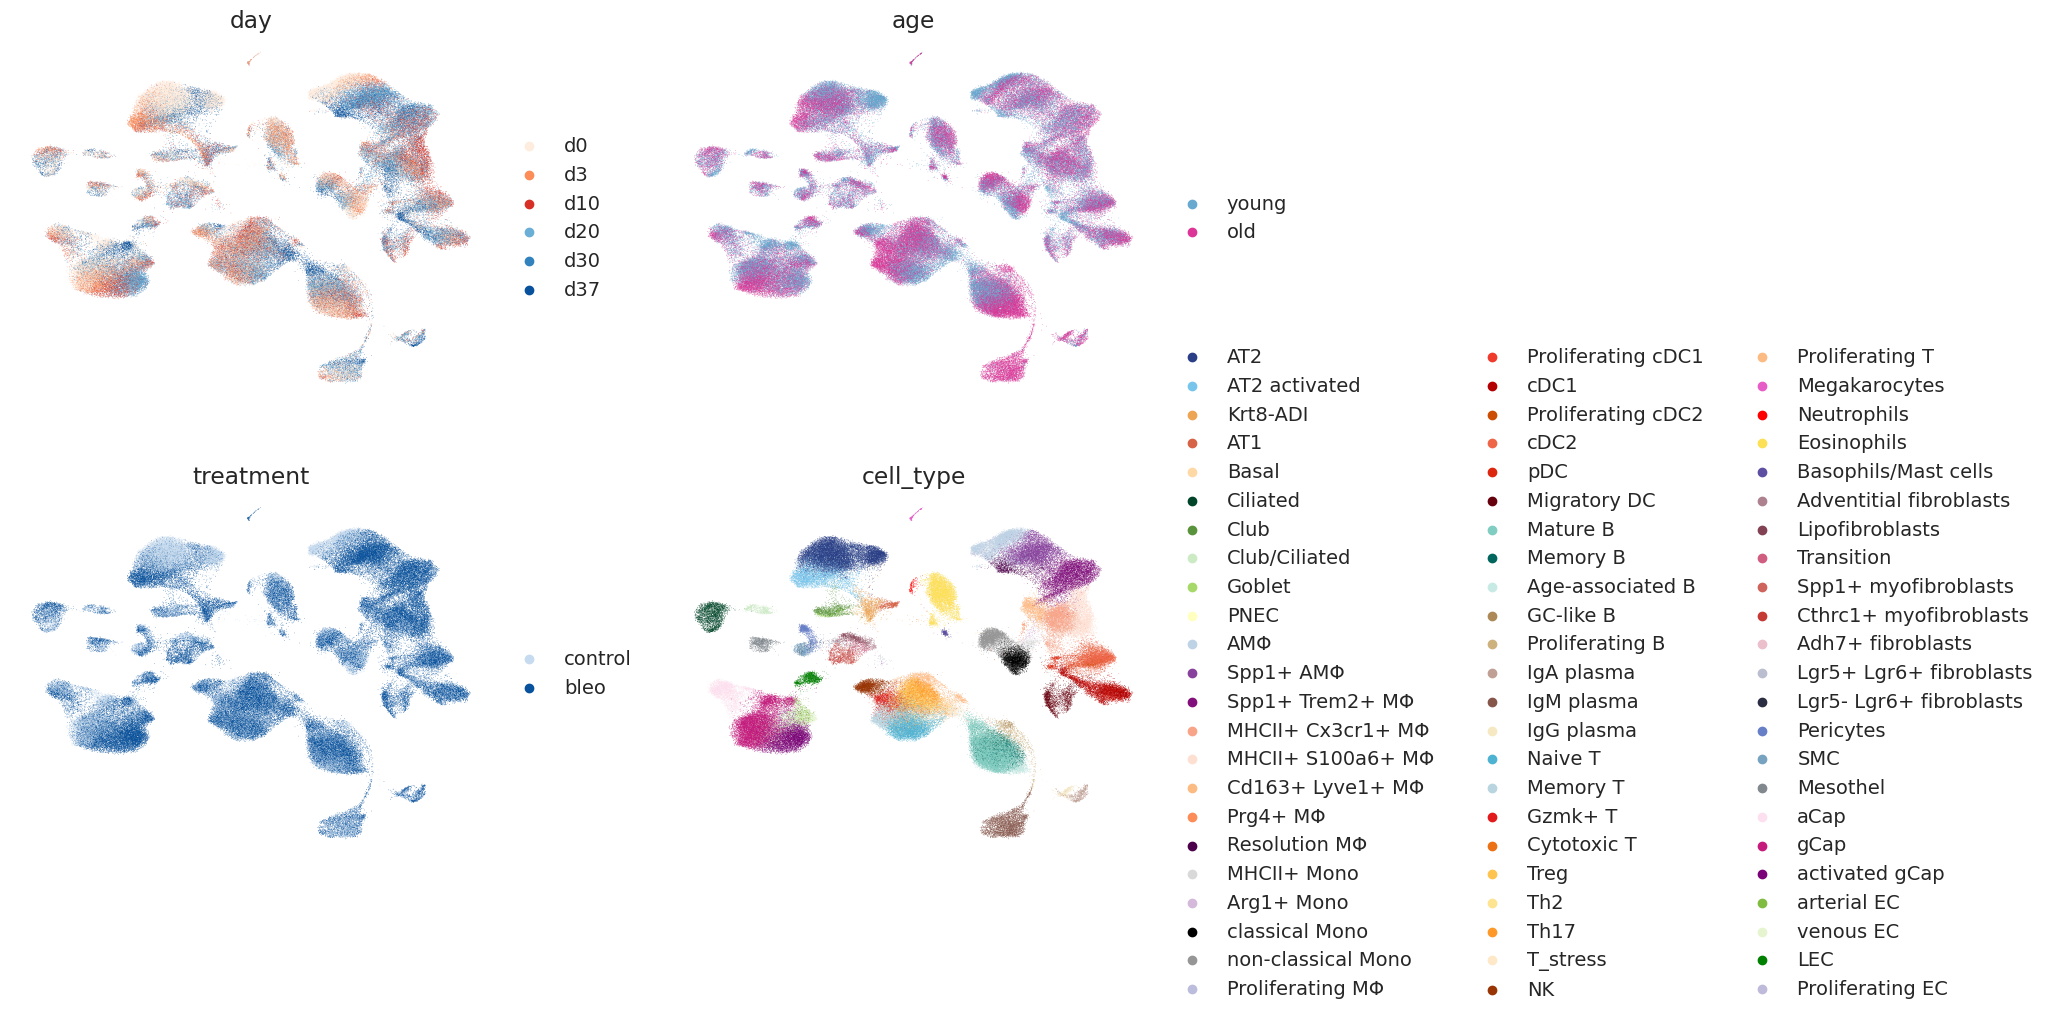

In [2]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "230111_Bleo_Ageing_annotated_final.h5ad", cache = False)
sc.pl.umap(adata, color = ["day", "age", "treatment", "cell_type"], 
           frameon=False,add_outline=False, outline_width=(0.05, 0.01), ncols=2, 
           wspace=0.25)

In [3]:
sc.tl.rank_genes_groups(adata, groupby = "cell_type", n_genes = 200, method="wilcoxon")

In [4]:
marker = codes.tidy_markers(adata, qval_thresh = 0.05, ct_label = "cell_type",)
marker.shape

(13655, 8)

In [5]:
marker.head()

,gene,score,logFC,pval,pval_adj,cell_type,pct.within,pct.outside
0,Sftpc,185.651764,10.898332,0.0,0.0,AT2,0.998399,0.033774
1,Sftpa1,183.285355,8.447448,0.0,0.0,AT2,0.998247,0.040072
2,Slc34a2,177.049805,7.090623,0.0,0.0,AT2,0.956088,0.032695
3,Sftpd,175.431580,6.678097,0.0,0.0,AT2,0.971106,0.045711
4,Sftpb,174.865936,6.658700,0.0,0.0,AT2,0.953572,0.042094


In [6]:
## Save the Marker Table
out_folder = "/media/HDD_1/Janine/"
marker.to_csv(out_folder + "20250625_marker_genes_Bleo_Aging.txt", sep = "\t")

### Summary Statistics / QC per sample

In [7]:
## Summary Statistics after Filtering
info = pd.DataFrame(data = adata.obs.identifier.cat.categories, columns = ["identifier"])

# Add age, age_day, sex, treatment
info["age"] = adata.obs.groupby(["identifier"])["age"].first().values
info["day"] = adata.obs.groupby(["identifier"])["day"].first().values
info["timepoints"] = adata.obs.groupby(["identifier"])["age_day"].first().values
info["sex"] = adata.obs.groupby(["identifier"])["sex"].first().values
info["treatment"] = adata.obs.groupby(["identifier"])["treatment"].first().values
info["n_counts"] = adata.obs.groupby(["identifier"])["n_counts"].median().values
info["n_genes"] = adata.obs.groupby(["identifier"])["n_genes"].median().values
info["percent_mito"] = adata.obs.groupby(["identifier"])["percent_mito"].mean().values
info["n_cells"] = adata.obs.groupby(["identifier"])["n_genes"].size().values

cell_type_counts = adata.obs.groupby(["identifier", "cell_type"]).size().unstack(fill_value=0)
# Merge with main info table
info = info.merge(cell_type_counts, how="left", on="identifier")

info.to_csv(out_folder + "20250506_QC_metrics_BleoAging.txt", sep = "\t", na_rep = "NA", index = False)
info

,identifier,age,day,timepoints,sex,treatment,n_counts,n_genes,percent_mito,n_cells,...,Pericytes,SMC,Mesothel,aCap,gCap,activated gCap,arterial EC,venous EC,LEC,Proliferating EC
0,muc26493,young,d0,young_d0,female,control,1255.0,724.0,0.031505,3190,...,16,26,23,64,242,28,21,30,11,8
1,muc26494,young,d0,young_d0,male,control,1439.0,790.0,0.048557,2955,...,28,11,6,91,450,4,20,34,7,33
2,muc26495,young,d0,young_d0,male,control,1165.0,691.0,0.045095,3203,...,16,6,45,72,117,9,24,38,18,7
3,muc26496,old,d0,old_d0,male,control,886.0,553.5,0.049371,2716,...,14,5,12,47,210,16,10,20,20,16
4,muc26497,old,d3,old_d3,female,bleo,1167.0,714.0,0.041249,3010,...,15,24,19,36,232,37,15,42,8,16
5,muc26498,young,d3,young_d3,male,bleo,1515.0,872.0,0.035613,3408,...,42,15,42,159,448,58,28,62,16,16
6,muc26499,young,d3,young_d3,female,bleo,1433.5,828.0,0.039070,2574,...,22,10,14,45,146,73,5,33,9,29
7,muc26500,young,d3,young_d3,female,bleo,1630.0,968.0,0.040792,2027,...,29,16,15,62,160,39,12,33,11,6
8,muc26501,old,d10,old_d10,male,bleo,1339.0,838.0,0.030130,3427,...,42,18,9,59,126,360,17,78,30,50
9,muc26502,old,d10,old_d10,male,bleo,1661.0,985.0,0.026695,3215,...,32,8,14,96,89,285,24,58,17,14
